In [306]:
from pyforest import *
from joblib import dump, load

In [467]:
data = pd.read_csv('data/total load station cleaned.csv')

In [681]:
data

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15
...,...,...,...,...,...,...
6296,9,20,9,16.4,982.55,99.65
6297,10,20,9,16.4,983.15,98.45
6298,11,20,9,16.1,983.10,95.20
6299,12,20,9,16.2,982.55,91.30


In [469]:
data.drop(columns=['Unnamed: 0', 'Temperature'], inplace=True)

In [470]:
data.dropna(axis=0, inplace=True)

In [471]:
data[data['Load'] == 44]

,Hour,Day,Month,Load,Pressure,Relative Humidity


In [472]:
data

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15
...,...,...,...,...,...,...
8755,20,31,12,44,980.10,35.80
8756,21,31,12,40.7,981.05,37.85
8757,22,31,12,35.2,981.60,40.85
8758,23,31,12,34.7,981.70,43.25


In [473]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7764 entries, 0 to 8759
Data columns (total 6 columns):
Hour                 7764 non-null int64
Day                  7764 non-null int64
Month                7764 non-null int64
Load                 7764 non-null object
Pressure             7764 non-null float64
Relative Humidity    7764 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 424.6+ KB


In [474]:
data.Load.dtypes

dtype('O')

In [475]:
data.drop(2108, inplace=True) #contained a null so drop

In [476]:
pd.to_numeric(data['Load'])

0       39.7
1       38.8
2       38.1
3       37.7
4       38.9
        ... 
8755    44.0
8756    40.7
8757    35.2
8758    34.7
8759    34.3
Name: Load, Length: 7763, dtype: float64

In [477]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7763 entries, 0 to 8759
Data columns (total 6 columns):
Hour                 7763 non-null int64
Day                  7763 non-null int64
Month                7763 non-null int64
Load                 7763 non-null object
Pressure             7763 non-null float64
Relative Humidity    7763 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 424.5+ KB


In [478]:
data['Load'] = data['Load'].astype(float)

In [479]:
data.drop(data[data['Load'] == 0].index, inplace=True)

In [480]:
# data[data['Load'] == 0]
data.drop(data[data['Month'] == 11].index, inplace=True)

In [481]:
data.drop(data[data['Month'] == 12].index, inplace=True)

In [482]:
data

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15
...,...,...,...,...,...,...
6296,9,20,9,16.4,982.55,99.65
6297,10,20,9,16.4,983.15,98.45
6298,11,20,9,16.1,983.10,95.20
6299,12,20,9,16.2,982.55,91.30


In [483]:
# data.to_csv('data_after_drops.csv')

In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6189 entries, 0 to 6300
Data columns (total 6 columns):
Hour                 6189 non-null int64
Day                  6189 non-null int64
Month                6189 non-null int64
Load                 6189 non-null float64
Pressure             6189 non-null float64
Relative Humidity    6189 non-null float64
dtypes: float64(3), int64(3)
memory usage: 338.5 KB


In [485]:
data.head()

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15


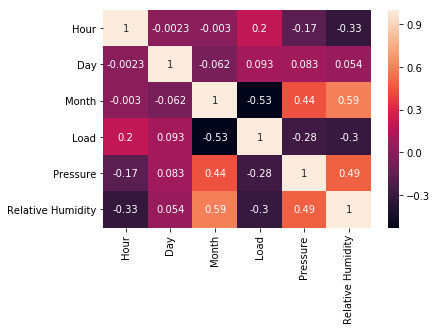

In [486]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [487]:
features = data[['Hour','Day','Pressure','Month','Relative Humidity']]

In [488]:
label = data[['Load']]

In [489]:
from sklearn.model_selection import train_test_split, cross_val_score

In [599]:
features_train, features_test, label_train, label_test = train_test_split(features,label, test_size=0.1, random_state=0)

In [600]:
features_train.shape

(5570, 5)

In [601]:
features_test.shape

(619, 5)

In [602]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# from sklearn
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [603]:
model = RandomForestRegressor()

In [604]:
model.fit(features_train, label_train)


/home/ghaff/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ghaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [605]:
prediction = model.predict(features_test)

In [606]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [607]:
np.sqrt(mean_squared_error(prediction, label_test))

2.676700824167722

In [608]:
mean_absolute_error(prediction, label_test)

1.5693376413570277

In [609]:
score = model.score(features_test, label_test)
score

0.921240614554219

In [361]:
dump(model, 'models/no-temp-rf' + str(np.round(score,2)) + '.joblib')

['models/no-temp-rf0.93.joblib']

### 93% score on test data

In [631]:
model = load('models/no-temp-rf0.93.joblib')

In [611]:
label_test.iloc[2]

Load    24.0
Name: 3738, dtype: float64

In [613]:
model.predict(features_test)[2]

23.069999999999997

In [390]:
prediction.shape

(619,)

In [391]:
label_test.shape

(619, 1)

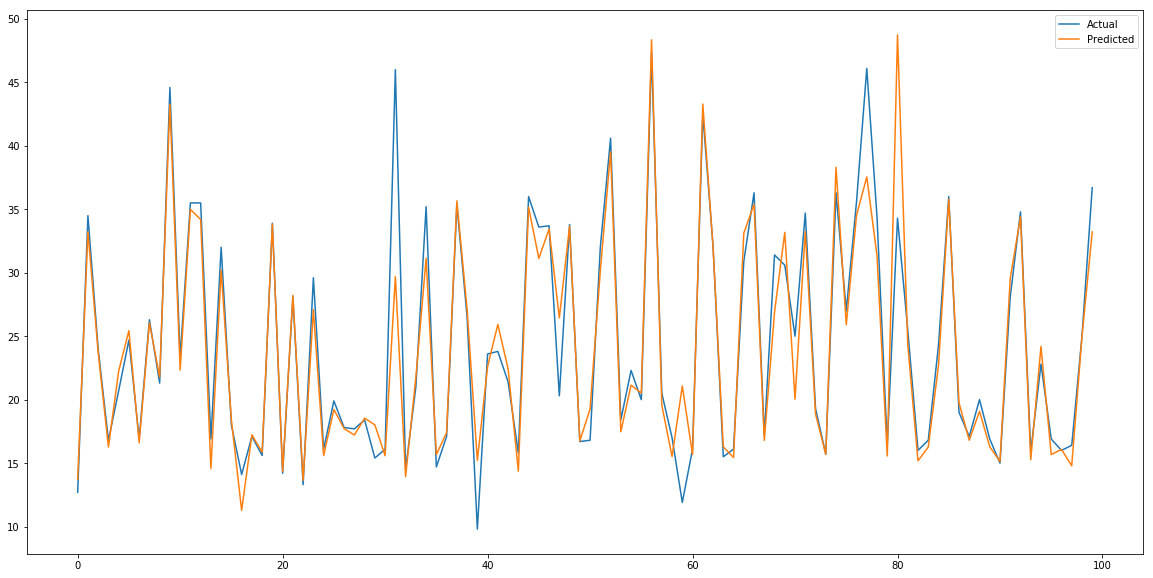

In [406]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(100), label_test['Load'][:100])
plt.plot(np.arange(100),prediction[:100])
plt.legend(['Actual','Predicted'])
plt.show()

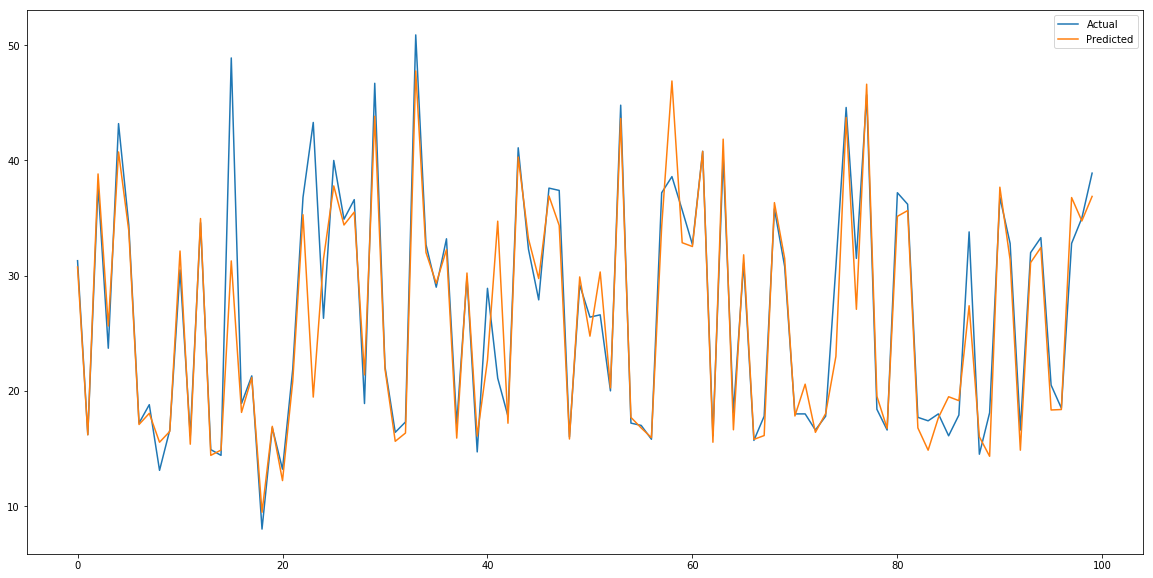

In [407]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(100), label_test['Load'][100:200])
plt.plot(np.arange(100),prediction[100:200])
plt.legend(['Actual','Predicted'])
plt.show()

In [410]:
#evaluation on the whole dataset
np.sqrt(mean_squared_error(model.predict(features), label))

1.5105388594217741

In [413]:
model.score(features, label)

0.9757109753741637

### Evaluating Predictions for First Eight Hours

In [632]:
firstEightHoursData = data[data['Hour'] <= 8 ]


In [633]:
firstEightHoursData

,Hour,Day,Month,Load,Pressure,Relative Humidity
0,1,1,1,39.7,981.25,42.90
1,2,1,1,38.8,981.05,45.25
2,3,1,1,38.1,980.70,50.90
3,4,1,1,37.7,980.60,55.30
4,5,1,1,38.9,980.95,60.15
...,...,...,...,...,...,...
6291,4,20,9,18.3,980.35,99.05
6292,5,20,9,18.8,980.40,99.30
6293,6,20,9,19.3,980.65,99.55
6294,7,20,9,16.4,981.25,99.75


In [654]:
firstEightHoursFeatures = firstEightHoursData[['Hour', 'Day','Pressure','Month','Relative Humidity']]
firstEightHoursFeatures

,Hour,Day,Pressure,Month,Relative Humidity
0,1,1,981.25,1,42.90
1,2,1,981.05,1,45.25
2,3,1,980.70,1,50.90
3,4,1,980.60,1,55.30
4,5,1,980.95,1,60.15
...,...,...,...,...,...
6291,4,20,980.35,9,99.05
6292,5,20,980.40,9,99.30
6293,6,20,980.65,9,99.55
6294,7,20,981.25,9,99.75


In [655]:
firstEightHoursLabels = firstEightHoursData[['Load']]
firstEightHoursLabels

,Load
0,39.7
1,38.8
2,38.1
3,37.7
4,38.9
...,...
6291,18.3
6292,18.8
6293,19.3
6294,16.4


In [656]:
firstEightHoursLabels.iloc[0]

Load    39.7
Name: 0, dtype: float64

In [657]:
firstEightHoursFeatures.loc[0]

Hour                   1.00
Day                    1.00
Pressure             981.25
Month                  1.00
Relative Humidity     42.90
Name: 0, dtype: float64

In [658]:
model.predict([firstEightHoursFeatures.loc[0]])

array([39.3])

In [659]:
model.score(firstEightHoursFeatures, firstEightHoursLabels)

0.9850364472726314

### 98.5% accuracy for hours between 12am and 8am

In [664]:
np.sqrt(mean_squared_error(model.predict(firstEightHoursFeatures), firstEightHoursLabels))

1.0654827150869544

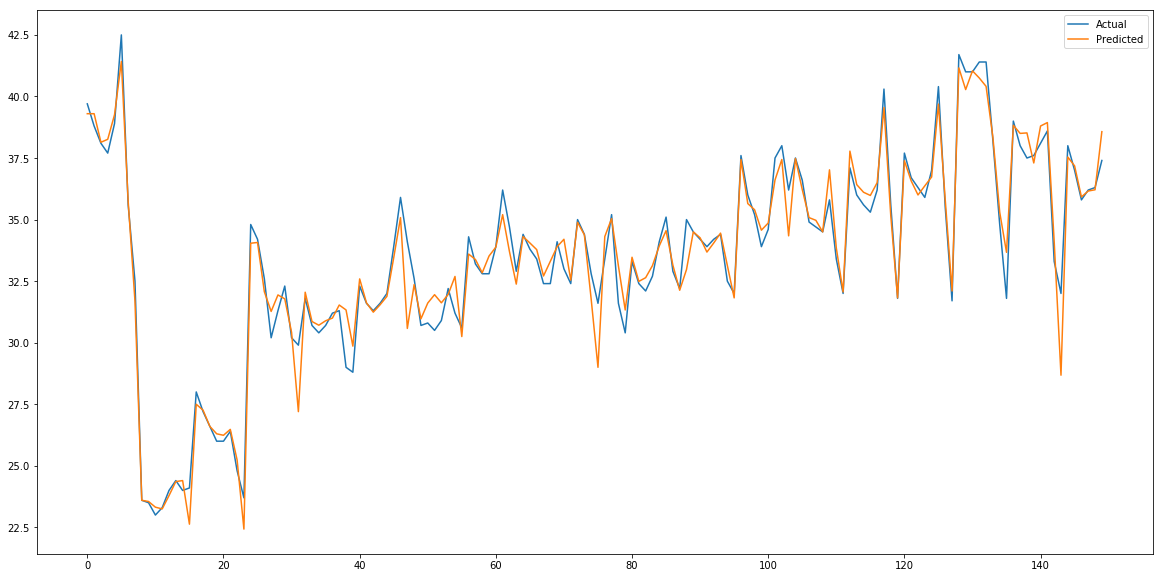

In [668]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(150), firstEightHoursLabels['Load'][:150])
plt.plot(np.arange(150),model.predict(firstEightHoursFeatures)[:150])
plt.legend(['Actual','Predicted'])
plt.show()

## Evaluating predictions for second eight hours

In [689]:
secondEightHoursData = data[data['Hour'] <= 16]
secondEightHoursData = secondEightHoursData[secondEightHoursData['Hour'] > 8]
secondEightHoursData

,Hour,Day,Month,Load,Pressure,Relative Humidity
8,9,1,1,32.4,982.95,45.60
9,10,1,1,33.3,983.20,38.85
10,11,1,1,33.7,982.90,32.60
11,12,1,1,34.7,982.10,26.70
12,13,1,1,34.8,981.10,21.85
...,...,...,...,...,...,...
6296,9,20,9,16.4,982.55,99.65
6297,10,20,9,16.4,983.15,98.45
6298,11,20,9,16.1,983.10,95.20
6299,12,20,9,16.2,982.55,91.30


In [687]:
secondEightHoursFeatures = secondEightHoursData[['Hour', 'Day','Pressure','Month','Relative Humidity']]
secondEightHoursFeatures

,Hour,Day,Pressure,Month,Relative Humidity
8,9,1,982.95,1,45.60
9,10,1,983.20,1,38.85
10,11,1,982.90,1,32.60
11,12,1,982.10,1,26.70
12,13,1,981.10,1,21.85
...,...,...,...,...,...
6296,9,20,982.55,9,99.65
6297,10,20,983.15,9,98.45
6298,11,20,983.10,9,95.20
6299,12,20,982.55,9,91.30


In [690]:
secondEightHoursLabels = secondEightHoursData[['Load']]
secondEightHoursLabels

,Load
8,32.4
9,33.3
10,33.7
11,34.7
12,34.8
...,...
6296,16.4
6297,16.4
6298,16.1
6299,16.2


In [691]:
model.score(secondEightHoursFeatures, secondEightHoursLabels)

0.9729103495877904

### 97.3% accuracy for hours between 8am and 4pm

In [692]:
np.sqrt(mean_squared_error(model.predict(secondEightHoursFeatures), secondEightHoursLabels))

1.3209253385411304

## Evaluating predictions for the third eight hours

In [ ]:
thirdEightHoursData = data[data['Hour'] <= 16]
thirdEightHoursData = thirdEightHoursData[thir['Hour'] > 8]
secondEightHoursData

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
rf_reg = RandomForestRegressor()

In [ ]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# features = scaler.fit_transform(features)

In [649]:
# scores = []
# # for train_index, test_index in kf.split(features):
# # #     X_train, X_test, y_train, y_test = features[train_index],features[test_index],label[train_index], label[test_index]
# #     X_train, X_test = features[train_index], features[test_index] 
# #     y_train, y_test = label[train_index], y[test_index]
# #     rf_reg.fit(X_train, y_train)
# #     scores.append(rf_reg.score(X_test,y_test))
# for i in range(5):
#     result = next(kf.split(features_train), None)
#     x_train = data.iloc[result[0]]
#     x_test = data.iloc[result[1]]
#     y_train = data.iloc[result[0]]
#     y_test = data.iloc[result[1]]
#     model = rf_reg.fit(x_train,y_train)
#     prediction = model.predict(x_test)
#     scores.append(model.score(x_test, y_test))
#     dump(model, 'cross-val-models/model(' + str(model.score(x_test,y_test)) + ').joblib')
    
# print(scores)
# print(np.mean(scores))

In [ ]:
new_model = load('cross-val-models/model(0.9371683413307422).joblib')

In [ ]:
np.sqrt(mean_squared_error(new_model.predict(features_test), label_test))